In [1]:
import os
import time
import math
import re
import struct
import traceback
import codecs

import bitstring

import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'ETL8G_01',
 'ETL8G_02',
 'ETL8G_03',
 'ETL8G_04',
 'ETL8G_05',
 'ETL8G_06',
 'ETL8G_07',
 'ETL8G_08',
 'ETL8G_09',
 'ETL8G_10',
 'ETL8G_11',
 'ETL8G_12',
 'ETL8G_13',
 'ETL8G_14',
 'ETL8G_15',
 'ETL8G_16',
 'ETL8G_17',
 'ETL8G_18',
 'ETL8G_19',
 'ETL8G_20',
 'ETL8G_21',
 'ETL8G_22',
 'ETL8G_23',
 'ETL8G_24',
 'ETL8G_25',
 'ETL8G_26',
 'ETL8G_27',
 'ETL8G_28',
 'ETL8G_29',
 'ETL8G_30',
 'ETL8G_31',
 'ETL8G_32',
 'ETL8G_33',
 'ETL8INFO',
 'etl_8g_inspect_data.ipynb']

In [3]:
file_list = [
    'ETL8G_01',
    'ETL8G_02',
    'ETL8G_03',
    'ETL8G_04',
    'ETL8G_05',
    'ETL8G_06',
    'ETL8G_07',
    'ETL8G_08',
    'ETL8G_09',
    'ETL8G_10',
    'ETL8G_11',
    'ETL8G_12',
    'ETL8G_13',
    'ETL8G_14',
    'ETL8G_15',
    'ETL8G_16',
    'ETL8G_17',
    'ETL8G_18',
    'ETL8G_19',
    'ETL8G_20',
    'ETL8G_21',
    'ETL8G_22',
    'ETL8G_23',
    'ETL8G_24',
    'ETL8G_25',
    'ETL8G_26',
    'ETL8G_27',
    'ETL8G_28',
    'ETL8G_29',
    'ETL8G_30',
    'ETL8G_31',
    'ETL8G_32',
    'ETL8G_33',
]

In [4]:
filename = file_list[0]
print(filename)
file_stream = bitstring.ConstBitStream(filename=filename)

ETL8G_01


In [5]:
record = file_stream.readlist(','.join([
    'int:16', # Serial Sheet Number - [0]
    'uint:16', # JIS Character Code (JIS X 0208) - [1]
    '8*uint:8', # JIS Typical Reading (e.g. 'AI.MEDER') - [2:10]
    'int:32', # Serial Data Number - [10]
    '4*int:8', # - [11:15]
    '4*uint:16', # - [15:19]
    '2*int:8', # x and y - [19:21]
    'pad:240',
    'bytes:8128', # 16-graylevel (4-bit) image of 128 x 127 = 16256 pixels
    'pad:88',
]))

In [6]:
print(type(record), len(record))
for idx, v in enumerate(record[:-1]):
    print(f'{idx} - {v}')

<class 'list'> 22
0 - 1
1 - 9250
2 - 65
3 - 46
4 - 72
5 - 73
6 - 82
7 - 65
8 - 32
9 - 32
10 - 1
11 - 0
12 - 0
13 - 1
14 - 24
15 - 3552
16 - 0
17 - 8001
18 - 16880
19 - 0
20 - 0


In [7]:
record_dict = {
    'JIS_CODE': record[1],
    'image_data': record[-1]
}

In [8]:
hex(record_dict['JIS_CODE'])

'0x2422'

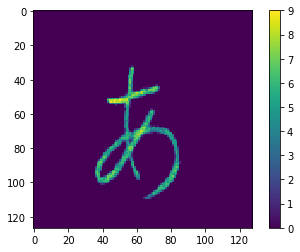

In [9]:
width = 128
height = 127
img = np.array(Image.frombytes('F', (width, height), record_dict['image_data'], 'bit', 4))
plt.imshow(img)
plt.colorbar()

In [10]:
total_samples = 0
record_count = {}

for filename in file_list:
    file_stream = bitstring.ConstBitStream(filename=filename)

    while True:
        try:
            record = file_stream.readlist(','.join([
                'int:16', # Serial Sheet Number - [0]
                'uint:16', # JIS Character Code (JIS X 0208) - [1]
                '8*uint:8', # JIS Typical Reading (e.g. 'AI.MEDER') - [2:10]
                'int:32', # Serial Data Number - [10]
                '4*int:8', # - [11:15]
                '4*uint:16', # - [15:19]
                '2*int:8', # x and y - [19:21]
                'pad:240',
                'bytes:8128', # 16-graylevel (4-bit) image of 128 x 127 = 16256 pixels
                'pad:88',
            ]))
        except:
            break
        
        total_samples += 1
        record_dict = {
            'JIS_CODE': record[1],
            'image_data': record[-1],
        }
        
        name = hex(record_dict['JIS_CODE'])
        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

In [11]:
total_samples

153916

In [12]:
len(record_count.keys())

956

In [13]:
record_count

{'0x2422': 161,
 '0x3026': 161,
 '0x3051': 161,
 '0x306d': 161,
 '0x3140': 161,
 '0x315f': 161,
 '0x3226': 161,
 '0x323f': 161,
 '0x3250': 161,
 '0x3271': 161,
 '0x332c': 161,
 '0x3357': 161,
 '0x3431': 161,
 '0x345b': 161,
 '0x3475': 161,
 '0x2424': 161,
 '0x352d': 161,
 '0x3559': 161,
 '0x356d': 161,
 '0x3626': 161,
 '0x364a': 161,
 '0x3667': 161,
 '0x3738': 161,
 '0x375d': 161,
 '0x3774': 161,
 '0x3831': 161,
 '0x3845': 161,
 '0x386c': 161,
 '0x387d': 161,
 '0x3941': 161,
 '0x2426': 161,
 '0x3967': 161,
 '0x3a3a': 161,
 '0x3a5a': 161,
 '0x3a7e': 161,
 '0x3b3d': 161,
 '0x3b4f': 161,
 '0x3b60': 161,
 '0x3b71': 161,
 '0x3c23': 161,
 '0x3c41': 161,
 '0x3c65': 161,
 '0x3c7b': 161,
 '0x3d2c': 161,
 '0x3d50': 161,
 '0x2428': 161,
 '0x3d6b': 161,
 '0x3e2e': 161,
 '0x3e4f': 161,
 '0x3e75': 161,
 '0x3f3c': 161,
 '0x3f5e': 161,
 '0x402f': 161,
 '0x403d': 161,
 '0x4055': 161,
 '0x4065': 161,
 '0x412a': 161,
 '0x4152': 161,
 '0x417d': 161,
 '0x4230': 161,
 '0x242a': 161,
 '0x423f': 161,
 '0x4262